Text(0.5, 0, 'Cluster')

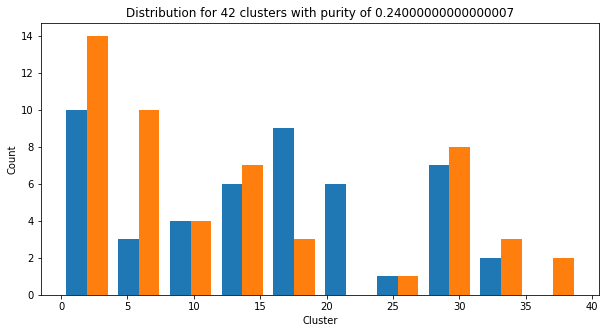

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import sys
import re
import random
from matplotlib import pyplot as plt

sys.path += ['/Users/giorgos.petkakis/Documents/GitHub/NLP2/src']

import data
document = data.get_raw_data('en')

list_all = list(document.values())
plt.figure(figsize=(10, 5))

random.shuffle(list_all)

tweets = ['\n'.join(tw.tweets) for tw in list_all]
tweets = [re.sub(r"HASHTAG|URL|RT|USER|amp", "", t) for t in tweets]

split = 200
tweetsTrain = tweets[:split]
tweetsTest = tweets[split:]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(tweetsTrain)

true_k = 42
model = KMeans(n_clusters=true_k, algorithm="full", init='k-means++', max_iter=5000, n_init=4)
model.fit(X)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

pred = np.zeros((len(tweetsTest), 2))
for i, tw in enumerate(tweetsTest):
    X = vectorizer.transform([tw])
    predicted = model.predict(X)
    pred[i] = [int(predicted), list_all[i + split].truth]

res = [(pred[np.where(pred[:, 1]==k)])[:,0] for k in range(2)]

cum_purity = 0
classes_predicted = true_k
for c in range(true_k):
    class_a = len(np.where(res[0]==c)[0])
    class_b = len(np.where(res[1]==c)[0])

    class_sum = class_a + class_b
    if class_sum != 0:
        purity = abs(0.5 - class_a / class_sum) * (class_sum/len(tweetsTest))
    else:
        purity = 0
    cum_purity += purity


plt.hist(res)
plt.title(f"Distribution for {true_k} clusters with purity of {cum_purity}")
plt.ylabel("Count")
plt.xlabel("Cluster")

# for i in range(true_k):
#     print("Cluster %d:" % i),
#     for ind in order_centroids[i, :10]:
#         print("%s" % terms[ind])